In [1]:
import pymc3 as pm
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import theano.tensor as tt
from theano import shared
import pandas as pd
from matplotlib import gridspec
from sklearn.decomposition import PCA, KernelPCA

import scipy as sp
from theano.compile.ops import as_op
from numpy import arange, array, empty
# from Plot_raw import *

D:\Softwares\Python\Python_Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [8]:
plt.style.use('default')
# 以下三行用于中文显示图形
from matplotlib.font_manager import FontProperties
font = FontProperties(fname=r"C:\\WINDOWS\\Fonts\\simsun.ttc", size=10)
np.set_printoptions(precision=0, suppress=True)

def Plot_raw1(elec_year, elec_faults, Savefig):
# 画出原始图
    Company_names = ['地区A', '地区B', '地区C']
    k = np.array([0, 82, 166])
    j= 0
    # j, k1 = 0, 6
    plt.figure(figsize=(3.5, 2.5), facecolor='w')
    ax = plt.subplot(1, 1, 1)
    for jx in range(7):
        ax.plot(elec_year[jx], elec_faults[jx], 'ko--', markersize=3, linewidth=1)
        # j = j+k1
    ax.set_xlim(0.5, 12.5)
    ax.set_ylim(-0.1, 2.5)
    
    label_f1 = "Noise data"
    ax.text(6.3,2.4, label_f1, fontsize=9, verticalalignment="top", horizontalalignment="right")
    ax.annotate('',xy=(2.0,2.1),xytext=(3.1,2.3),arrowprops=dict(arrowstyle="->",connectionstyle="arc3"))

    ax.set_xticks(np.linspace(1,12,6)) 
    ax.set_xticklabels(['2010.3',  '2011.3', '2012.3', '2013.3',  '2014.3',  '2015.3'],rotation=45, fontsize='small')
    plt.yticks(fontsize='small')
    
    plt.xlabel(u"时间t/年", fontsize=14, fontproperties=font)
    plt.ylabel(u"故障率/%", fontsize=14, fontproperties=font)
    plt.legend([Company_names[0]], loc='upper right', frameon=False, fontsize='small', prop=font)
    
    # plt.grid()
    if Savefig == 1:
        plt.savefig('E:\\Code\\Bayescode\\QW_reliable\\EI\\Picture\\New1.png', dpi = 200, bbox_inches='tight')
    plt.show()
    
    plt.figure(figsize=(3.5, 2.5), facecolor='w')
    ax = plt.subplot(1, 1, 1)
    for jx in range(7, 14, 1):
        ax.plot(elec_year[jx], elec_faults[jx], 'ko--', markersize=3, linewidth=1)
        # j = j+k1
    ax.set_xlim(0.5, 12.5)
    ax.set_ylim(-0.02, 0.6)
    
    label_f1 = "Noise data"
    ax.text(4.3,0.58, label_f1, fontsize=9, verticalalignment="top", horizontalalignment="right")
    ax.annotate('',xy=(5.0,0.52),xytext=(3.5,0.53),arrowprops=dict(arrowstyle="->",connectionstyle="arc3"))
    
    ax.set_xticks(np.linspace(1,12,6)) 
    ax.set_xticklabels(['2010.3',  '2011.3', '2012.3', '2013.3',  '2014.3',  '2015.3'],rotation=45, fontsize='small')
    plt.yticks(fontsize='small')
    
    plt.xlabel(u"时间t/年", fontsize=14, fontproperties=font)
    plt.ylabel(u"故障率/%", fontsize=14, fontproperties=font)
    plt.legend([Company_names[1]], loc='upper right', frameon=False, fontsize='small', prop=font)
    # plt.grid()
    if Savefig == 1:
        plt.savefig('E:\\Code\\Bayescode\\QW_reliable\\EI\\Picture\\New2.png', dpi = 200, bbox_inches='tight')
    plt.show()
    
    plt.figure(figsize=(3.5, 2.5), facecolor='w')
    ax = plt.subplot(1, 1, 1)
    for jx in range(14, 21, 1):
        ax.plot(elec_year[jx], elec_faults[jx], 'ko--', markersize=3, linewidth=1)
        # j = j+k1
    ax.set_xlim(0.5, 12.5)
    ax.set_xticks(np.linspace(1,12,6)) 
    ax.set_xticklabels(['2010.3',  '2011.3', '2012.3', '2013.3',  '2014.3',  '2015.3'],rotation=45, fontsize='small')
    
    plt.xlabel(u"时间t/年", fontsize=14, fontproperties=font)
    plt.ylabel(u"故障率/%", fontsize=14, fontproperties=font)
    plt.legend([Company_names[2]], loc='upper left', frameon=False, fontsize='small', prop=font)

    ax.set_xlim(0.5, 12.5)
    ax.set_xticks(np.linspace(1,12,6)) 
    ax.set_xticklabels(['2010.3',  '2011.3', '2012.3', '2013.3',  '2014.3',  '2015.3'],rotation=45, fontsize='small')
    plt.yticks(fontsize='small')
    
    # plt.legend([ax1], [u'本文算法'], frameon=False, fontsize='small',loc='upper left', prop=font)

    if Savefig == 1:
        plt.savefig('E:\\Code\\Bayescode\\QW_reliable\\EI\\Picture\\New3.png', dpi = 200, bbox_inches='tight')
    plt.show()
    return 0

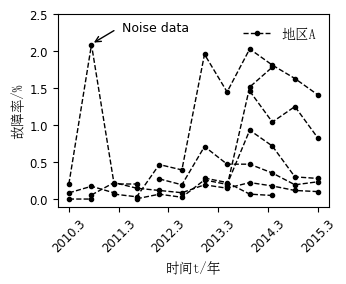

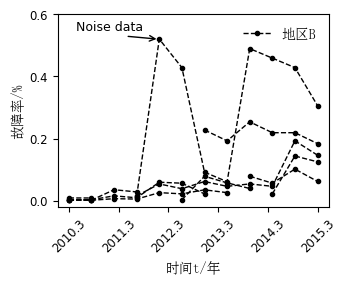

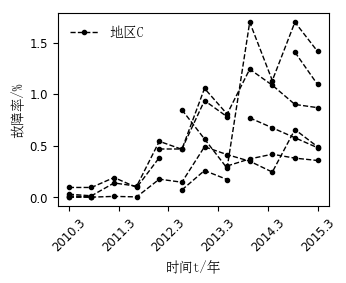

0

In [9]:
# 以下三行用于中文显示图形
from matplotlib.font_manager import FontProperties
# from pymc3 import get_data
font = FontProperties(fname=r"C:\\WINDOWS\\Fonts\\simsun.ttc", size=10)
np.set_printoptions(precision=0, suppress=True)

Savefig = 0 # 控制图形显示存储
plt.style.use('default')
data_plot = pd.read_csv('XZnozero_12_stop.csv')
year_plot = data_plot.Year.values  # 观测时间值x1
year_plot = np.ma.masked_values(year_plot, value=-999)
# print(year_plot)

faults_plot = (data_plot.Fault.values)  # 数组形式,计算故障率大小
faults_plot = np.ma.masked_values(faults_plot, value=-999)
faults_plot = 100*faults_plot / data_plot.Nums.values

# 将故障率以6组一行形式组成数组,变成：21*6
year_plot2 = np.array([year_plot[i*12:(i+1)*12] for i in np.arange(21)])
faults_plot2 = np.array([faults_plot[i*12:(i+1)*12] for i in np.arange(21)])

year_plot2 = np.ma.masked_values(year_plot2, value=-999)
faults_plot2 = np.ma.masked_values(faults_plot2, value=100)

Plot_raw1(year_plot2, faults_plot2, Savefig)

In [17]:
np.set_printoptions(precision=0, suppress=True)
Savefig = 0 # 控制图形显示存储
plt.style.use('default')
elec_data = pd.read_csv('XZnozero_12_stop_stor.csv')

# 计算同一公司产品测试地点数目：
companies_num = elec_data.counts.unique()
companies = len(companies_num)  # companies=7， 共7个测试地点
company_lookup = dict(zip(companies_num, range(len(companies_num))))
company = elec_data['company_code'] = elec_data.counts.replace(company_lookup).values  # 加一行数据在XZsingal文件中

# 计算不同公司数目
company_ABC = elec_data.company.unique()
companiesABC = len(company_ABC)  # companies=7， 共7个测试地点
company_lookup_ABC = dict(zip(company_ABC, range(len(company_ABC))))
companyABC = elec_data['company_ABC'] = elec_data.company.replace(company_lookup_ABC).values  # 加一行数据在XZsingal文件中

# 给所有特征因素加上高斯噪声
SNR = np.random.normal(0, 1, size=[len(elec_data.Year.values), 3])

# #特征因素分析
elec_tem = elec_data.Tem.values # 观测温度值x2，温度不加噪声
elec_tem1 = (elec_tem - np.mean(elec_tem)) / np.std(elec_tem)
elec_hPa = elec_data.hPa.values + SNR[:, 0]  # 观测压强x3
elec_hPa1 = (elec_hPa - np.mean(elec_hPa)) / np.std(elec_hPa)
elec_RH = elec_data.RH.values + SNR[:, 1] # 观测压强x3
elec_RH1 = (elec_RH - np.mean(elec_RH)) / np.std(elec_RH)
elec_Lux = elec_data.Lux.values + SNR[:, 2] # 观测压强x3
elec_Lux1 = (elec_Lux - np.mean(elec_Lux)) / np.std(elec_Lux)

# 计算观测时间，温度，光照等环境条件
elec_year = elec_data.Year.values  # 观测时间值x1
elec_year1 = (elec_year - np.mean(elec_year)) / np.std(elec_year)
# data_cs_year = 
print(elec_year[116:])

# np.savetxt('XZ_nomean.csv', elec_Pca2, delimiter = ',')
# 计算故障率大小：故障数目/总测量数，作为模型Y值，放大100倍以增加实际效果，结果中要缩小100倍
elec_faults = 1000*(elec_data.Fault.values / elec_data.Nums.values)  # 数组形式,计算故障率大小
elec_faults[3] = 2
elec_faults[79] = 2
print(elec_faults)
 
# 将故障率以6组一行形式组成数组,变成：21*6
elec_faults2 = np.array([elec_faults[i*12:(i+1)*12] for i in np.arange(21)])
elec_year2 = np.array([elec_year[i*12:(i+1)*12] for i in np.arange(21)])
companyABC2 = np.array([companyABC[i*12:(i+1)*12] for i in np.arange(21)])
# elec_faults2 = np.ma.masked_values(elec_faults2, value=1000)

# Plot_raw(elec_year2, elec_faults2, Savefig)
# 共享变量设置

ys_faultsA = shared(np.asarray(elec_faults[:58]))
ys_faultsB = shared(np.asarray(elec_faults[58:116]))
ys_faultsC = shared(np.asarray(elec_faults[116:]))

xs_yearA = shared(np.asarray(elec_year[:58]))
xs_yearB = shared(np.asarray(elec_year[58:116]))
xs_yearC = shared(np.asarray(elec_year[116:]))
# Num_shared = shared(np.asarray(companyABC))

def logit(x):
    return 1/(1+np.exp(-x))
def Invlogit(x):
    return tt.exp(x)/(1+tt.exp(x))

[ 1  1  1  1  1  2  2  2  2  2  3  3  3  4  4  4  5  5  5  5  6  6  6  6  6
  7  7  7  7  7  8  8  8  8  8  8  9  9  9  9  9 10 10 10 10 10 11 11 11 11
 11 11 12 12 12 12 12 12]
[  2.   0.   1.   2.   0.   1.   2.   2.   2.   1.   1.   0.   2.   2.   0.
   1.   1.   3.   5.   0.   1.   2.   4.   3.   3.   2.   7.  20.   2.   2.
   2.   5.   2.  15.   9.  15.   1.   2.   5.  15.  20.   7.  10.   1.   2.
   4.  18.  18.   3.  13.   1.   2.  16.   3.   8.   1.   2.  14.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   1.   1.   2.   0.   1.   0.   4.   0.   0.   0.   2.   1.   1.
   1.   0.   2.   0.   1.   1.   1.   3.   1.   5.   0.   1.   0.   2.   0.
   5.   1.   1.   2.   2.   4.   1.   1.   2.   1.   3.   0.   0.   0.   0.
   1.   0.   0.   0.   0.   1.   0.   1.   2.   0.   1.   1.   2.   5.   4.
   5.   1.   1.   5.   8.   5.   3.   5.  11.   6.   9.   2.   4.   3.   8.
   3.   8.   4.   4.  12.   8.  17.   2.   4.  11.   7.  11.  

In [18]:
# # 噪声处理
# import agate
# import agatestats
# # np.savetxt('outline_fault_C.csv', elec_faults[116:], delimiter = ',')
# table = agate.Table.from_csv('outline_fault_C.csv')

# outliers = table.stdev_outliers('Fault', deviations=2, reject=True)
# # print(outliers)
# # print(len(outliers.rows))
# outliers1 = table.mad_outliers('Fault', deviations=3, reject=False)
# # print(outliers1)
# # print(len(outliers1.rows))
# # outliers.to_csv('outline.csv')

In [19]:
# 采用三次B样条基函数进行拟合
x_zhou = 12 #为实现短期预测，这里必须要取12以上的值否则无法进行长期的预测
Num = len(elec_faults[:58])
knots = np.linspace(0, x_zhou, Num)

Num_5 = 5 * len(elec_faults[:58])
# Num_5 = shared(Num_51)
model_knots = np.linspace(1, x_zhou, Num_5)


# 能否将这里代码改为@as_op的形式，来让x的值得以调用
basis_funcs = sp.interpolate.BSpline(knots, np.eye(Num_5), k=3) # eye()生成对角矩阵
Bx = basis_funcs(xs_yearA.get_value())  # 表示在取值为x时的插值函数值
BxB = basis_funcs(xs_yearB.get_value())  # 表示在取值为x时的插值函数值
BxC = basis_funcs(xs_yearC.get_value())  # 表示在取值为x时的插值函数值
# shared:符号变量（symbolic variable），a之所以叫shared variable是因为a的赋值在不同的函数中都是一致的搜索，即a是被shared的
Bx_ = shared(Bx)
Bx_B = shared(BxB)
Bx_C = shared(BxC)

In [20]:
# 三次样条模型
tmp0 = np.loadtxt('tmp0_model1_df_summary.csv',delimiter = ',')
MAP_tmp0 = tmp0[:,0]/10
betaMAP = MAP_tmp0[:58]
betaMAPB = MAP_tmp0[58:116]
betaMAPC = MAP_tmp0[116:]

#广义线性模型
tmp = np.loadtxt('tmp_model2_df_summary.csv',delimiter = ',')
MAP_tmp = tmp[:,0]/10
betaMAP2 = MAP_tmp[:58]
betaMAPB2 = MAP_tmp[58:116]
betaMAPC2 = MAP_tmp[116:]

# 高斯游走模型
tmp3 = np.loadtxt('tmp3_model3_df_summary.csv',delimiter = ',')
MAP_tmp3 = tmp3[:,0]/10
betaMAP3 = MAP_tmp3[:58]
betaMAPB3 = MAP_tmp3[58:116]
betaMAPC3 = MAP_tmp3[116:]

# 置信区间
post_pred = np.loadtxt('pp_trace_1_fit_A.csv',delimiter = ',')
post_predB = np.loadtxt('pp_trace_1_fit_B.csv',delimiter = ',')
post_predC = np.loadtxt('pp_trace_1_fit_C.csv',delimiter = ',')
post_pred = post_pred/10
post_predB = post_predB/10
post_predC = post_predC/10

[ 1  1  1  2  2  2  2  3  3  3  3  4  4  4  4  5  5  5  5  6  6  6  6  7  7
  7  7  7  8  8  8  8  8  8  9  9  9  9  9  9  9 10 10 10 10 10 10 10 11 11
 11 11 11 12 12 12 12 12]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.]


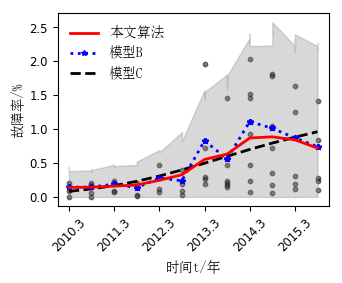

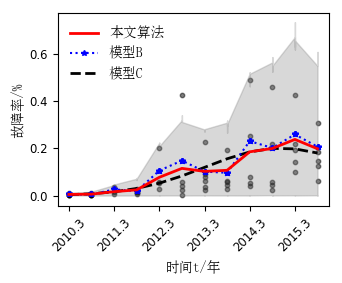

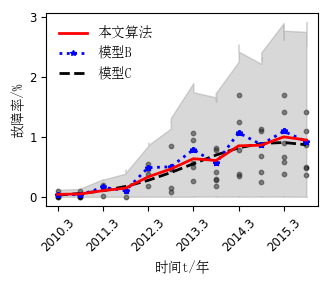

In [54]:
# 后验。第7年数据,貌似没法进行第7年的预测
data_cs_year = elec_year
print(data_cs_year[:58])

yipred_mean = post_pred.mean(axis=0)
yipred_meanB = post_predB.mean(axis=0)
yipred_meanC = post_predC.mean(axis=0)
print(yipred_mean)
sig0 = pm.hpd(post_pred, alpha=0.05)
sig1 = pm.hpd(post_predB, alpha=0.05)
sig2 = pm.hpd(post_predC, alpha=0.05)
# print(sig0)

ip=0
fig, ax = plt.subplots(figsize=(3.5, 2.5))
 
ax.scatter(elec_year[:58], elec_faults[:58]/10, marker='o',s=10, color='k', alpha=.5)

plt.fill_between(elec_year[:58], sig0[:,0], sig0[:,1], color='gray', alpha=.3) 

ax1, = ax.plot(elec_year[:58], betaMAP2, 'k--', linewidth=2)
ax2, = ax.plot(elec_year[:58], betaMAP3, 'b*:',markersize=4, linewidth=2)
ax3, = ax.plot(elec_year[:58], betaMAP[:58],  'r', linewidth=2)
ax.set_xlim(0.5, 12.5)
# ax.set_xticklabels(['2016', '2010.3', '2010.9', '2011.3', '2011.9', '2012.3', '2012.9', '2013.3', '2013.9', '2014.3', '2014.9', '2015.3', '2015.9'],rotation=45, fontsize='small')
plt.xticks([1, 3,  5,  7,  9,  11],
  [ '2010.3',  '2011.3',  '2012.3',  '2013.3', '2014.3',  '2015.3'],rotation=45, fontsize='small')
plt.yticks(fontsize='small')
plt.legend([ax3, ax2, ax1], [u'本文算法', u'模型B', u'模型C'], frameon=False, fontsize='small',loc='upper left', prop=font)
plt.xlabel(u"时间t/年", fontsize=14, fontproperties=font)
plt.ylabel(u"故障率/%", fontsize=14, fontproperties=font)
Savefig=0
if Savefig == 1:
    plt.savefig('E:\\Code\\Bayescode\\QW_reliable\\EI\\Picture\\Fitting1.png', dpi = 200, bbox_inches='tight')

plt.show()


ip=1
fig, ax = plt.subplots(figsize=(3.5, 2.5))

ax.scatter(elec_year[58:116], elec_faults[58:116]/10, marker='o', s=10,color='k', alpha=.5)

plt.fill_between(data_cs_year[58:116], sig1[:,0], sig1[:,1], color='gray', alpha=.3)

ax1, = ax.plot(elec_year[58:116], betaMAPB2,  'k--', linewidth=2)
ax2, = ax.plot(elec_year[58:116], betaMAPB3,'b*:',  markersize=4)
ax3, = ax.plot(elec_year[58:116], betaMAPB[:], 'r', linewidth=2)
plt.legend([ax3, ax2, ax1], [u'本文算法', u'模型B', u'模型C'], frameon=False, fontsize='small',loc='upper left', prop=font)
ax.set_xlim(0.5, 12.5)
# ax.set_xticklabels(['2016', '2010.3', '2010.9', '2011.3', '2011.9', '2012.3', '2012.9', '2013.3', '2013.9', '2014.3', '2014.9', '2015.3', '2015.9'],rotation=45, fontsize='small')
plt.xticks([1, 3,  5,  7,  9,  11],
  [ '2010.3',  '2011.3',  '2012.3',  '2013.3', '2014.3',  '2015.3'],rotation=45, fontsize='small')
plt.yticks(fontsize='small')
plt.xlabel(u"时间t/年", fontsize=14, fontproperties=font)
plt.ylabel(u"故障率/%", fontsize=14, fontproperties=font)
if Savefig == 1:
    plt.savefig('E:\\Code\\Bayescode\\QW_reliable\\EI\\Picture\\Fitting2.png', dpi = 200, bbox_inches='tight')

plt.show()


ip=2
fig, ax = plt.subplots(figsize=(3.5, 2.5))

ax.scatter(elec_year[116:], elec_faults[116:]/10, marker='o', s=10, color='k', alpha=.5)

plt.fill_between(elec_year[116:], sig2[:,0], sig2[:,1], color='gray', alpha=.3) 

ax1, = ax.plot(elec_year[116:], betaMAPC2,  'k--', linewidth=2)
ax2, = ax.plot(elec_year[116:], betaMAPC3,'b*:',markersize=4, linewidth=2,)
ax3, = ax.plot(elec_year[116:], betaMAPC, 'r', linewidth=2)
ax.set_xlim(0.5, 12.5)
# ax.set_xticks(np.linspace(1,12,6)) 
# ax.set_xticklabels(['2010.3',  '2011.3', '2012.3', '2013.3',  '2014.3',  '2015.3'],rotation=45, fontsize='small')
plt.xticks([1, 3,  5,  7,  9,  11],
  [ '2010.3',  '2011.3',  '2012.3',  '2013.3', '2014.3',  '2015.3'],rotation=45, fontsize='small')
plt.yticks(fontsize='small')
plt.legend([ax3, ax2, ax1], [u'本文算法', u'模型B', u'模型C'], frameon=False, fontsize='small',loc='upper left', prop=font)
plt.xlabel(u"时间t/年", fontsize=14, fontproperties=font)
plt.ylabel(u"故障率/%", fontsize=14, fontproperties=font)
if Savefig == 1:
    plt.savefig('E:\\Code\\Bayescode\\QW_reliable\\EI\\Picture\\Fitting3.png', dpi = 200, bbox_inches='tight')
plt.show()

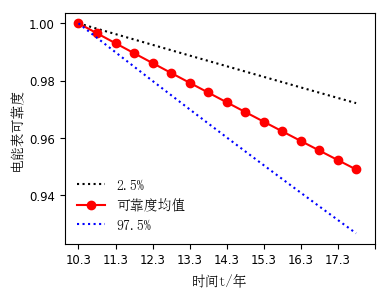

In [11]:
# 可靠度计算，beta_mu要除以100还原
font1 ={'family': 'times new roman', 'weight':'light', 'size': 12}  
R11 = np.loadtxt('R11_reliable.csv',delimiter = ',')
R22 = np.loadtxt('R22_reliable.csv',delimiter = ',')
R33 = np.loadtxt('R33_reliable.csv',delimiter = ',')

t = np.arange(0, 16, 1)
fig = plt.figure(figsize=(4, 3))
ax = plt.subplot(1, 1, 1)
plt.plot(t, R22, 'k:', t, R11, 'ro-', t, R33, 'b:')
# ax.set_xticklabels(['2016', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017'], fontsize='small')
# ax.set_xlim(-0.5, 12.5)
ax.set_xticks(np.linspace(0,16,9)) 
ax.set_xticklabels(['10.3',  '11.3', '12.3', '13.3',  '14.3',  '15.3',  '16.3',  '17.3'], fontsize='small')

plt.yticks(fontsize='small')
plt.xticks(fontsize='small')
# plt.legend([Company_names[0]], loc='upper left', frameon=False, fontsize='small')
ax.legend([u'2.5%',u'可靠度均值',u'97.5%'], loc='lower left',frameon=False, fontsize='small', prop=font)
plt.xlabel(u"时间t/年", fontsize=14, fontproperties=font)
plt.ylabel(u"电能表可靠度", fontsize=14, fontproperties=font)
# plt.savefig('E:\\Code\\Bayescode\\QW_reliable\\EI\\Picture\\Reliability.png', dpi = 200, bbox_inches='tight')
plt.show()

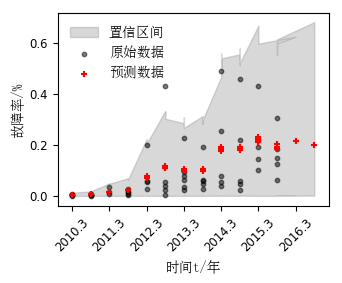

In [69]:
# 后验。第7年数据,貌似没法进行第7年的预测
data_cs = pd.read_csv('XZnozero_12_stop_stor_pred.csv')
data_cs_year = data_cs.Year.values # 测试数据时间

pred_valueB = np.loadtxt('post_predB_model1.csv',delimiter = ',')
pred_valueB = pred_valueB/10

pred_meanB = pred_valueB.mean(axis=0)
sig11 = pm.hpd(pred_valueB, alpha=0.05)


fig = plt.figure(figsize=(3.5, 2.5))
ax = plt.subplot(1, 1, 1)
plt.fill_between(data_cs_year[58:116], sig11[:,0], sig11[:,1], color='gray', alpha=.3)
ax.scatter(elec_year[58:116], elec_faults[58:116]/10, marker='o', s=10,color='k', alpha=.5)
 
ax.scatter(data_cs_year[58:116], pred_meanB, marker='+', s=20, color='r')
plt.legend([u"置信区间",u"原始数据", u"预测数据"], frameon=False, fontsize='small',loc='upper left', prop=font)

# ax.set_xlim(0.5, 14.5)
plt.xticks([1, 3,  5,  7,  9,  11, 13],
  [ '2010.3',  '2011.3',  '2012.3',  '2013.3', '2014.3','2015.3', '2016.3'],rotation=45, fontsize='small')
plt.yticks(fontsize='small')
plt.xticks(fontsize='small')
plt.xlabel(u"时间t/年", fontsize=14, fontproperties=font)
plt.ylabel(u"故障率/%", fontsize=14, fontproperties=font)
plt.savefig('E:\\Code\\Bayescode\\QW_reliable\\EI\\Picture\\Pred1.png', dpi = 200, bbox_inches='tight')
plt.show()